This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html

In [1]:
%matplotlib inline

In [2]:
import thinkplot
from thinkbayes2 import Suite

In [3]:
class Dice(Suite):
    """Represents hypotheses about which die was rolled."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer number of sides on the die
        data: integer die roll
        """
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [4]:
class Train(Dice):
    """The likelihood function for the train problem is the same as
    for the Dice problem."""

In [5]:
def Mean(suite):
    total = 0
    for hypo, prob in suite.Items():
        total += hypo * prob
    return total

In [6]:
def MakePosterior(high, dataset):
    hypos = range(1, high+1)
    suite = Train(hypos)
    suite.label = str(high)

    for data in dataset:
        suite.Update(data)
    thinkplot.Pmf(suite)
    return suite

500 151.84958795903822
1000 164.30558642273363
2000 171.33818109150937


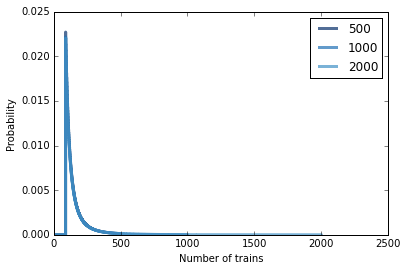

In [7]:
dataset = [30, 60, 90]

for high in [500, 1000, 2000]:
    suite = MakePosterior(high, dataset)
    print(high, suite.Mean())
    thinkplot.Config(xlabel='Number of trains',
                     ylabel='Probability')
